## Importing Libraries

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import missingno
print("Import Successful")

Import Successful


## Collecting all the links of the products along with Price and Ratings

In [11]:
link=[]
rating=[]
price=[]
total_pages=45 
for page in range(1,total_pages):
    progress = (page+1) / total_pages * 100
    print(f"Progress: {progress:.2f}%",f"Page No.:{page+1}",end="\r")
    r=requests.get(f'https://www.flipkart.com/search?q=LAPTOP&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={page}').text
    soup=BeautifulSoup(r,"html")
    for b in soup.find_all(class_='CGtC98'):
        link.append("https://www.flipkart.com"+b.get("href"))
    for a in soup.find_all(class_="yKfJKb row"):
        for c in a.find_all(class_='Nx9bqj _4b5DiR'):
            price.append(c.get_text())
        if a.find_all(class_="_5OesEi"):
            for d in a.find_all(class_="_5OesEi"):
               b1=d.get_text()
            if "." in b1[:3]:
                rating.append(b1[:3])         
            else:
                rating.append(b1[0]) 
        else:
            rating.append('NaN') 

## Creating Dictionary for each Product storing its details

In [32]:
import time
List=[]
start=time.time()
for i,s in enumerate(link):
    progress = (i+1) / len(link) * 100
    print(f"Progress: {progress:.2f}%",f"Page No.:{i+1}",end="\r")
    data=[]
    data.append('id')
    data.append(i)
    r=requests.get(s).text
    soup=BeautifulSoup(r,'html')
   
    table=soup.find_all('table')
    for j in table:
        for i in j.find_all('td'):
            data.append((i.text))
    heading=data[::2]
    values=data[1::2]
    info={}
    for i,j in zip(heading,values):
        if i in info:
            info[i].append(j)
        else:
            info[i]=[j]
    List.append(info)
    
end=time.time()
print(f'{round((end-start)/60,2)} Mins')    

10.11 Mins100.00% Page No.:984


### Empty Dataset

In [36]:
Laptop_Details=pd.DataFrame([],columns=list(set(heading)))
Laptop_Details    

,RAM,MS Office Provided,Screen Resolution,Battery Backup,RAM Type,Operating System,Processor Generation,Covered in Warranty,Warranty Summary,SSD Capacity,...,Screen Type,Series,Disk Drive,USB Port,Finger Print Sensor,Storage Type,Screen Size,Processor Brand,Wireless LAN,Battery Cell


### Making each dict a DataFrame and Joining them..

In [38]:
for i in List:
    df=pd.DataFrame(i)
    Laptop_Details=pd.concat((Laptop_Details,df))   
Laptop_Details.reset_index(inplace=True)

In [46]:
Laptop_Details.to_csv(r'C:\Users\admin\Downloads\lappy.csv')

In [8]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('lappy.csv')
df.shape

(960, 101)

<Axes: >

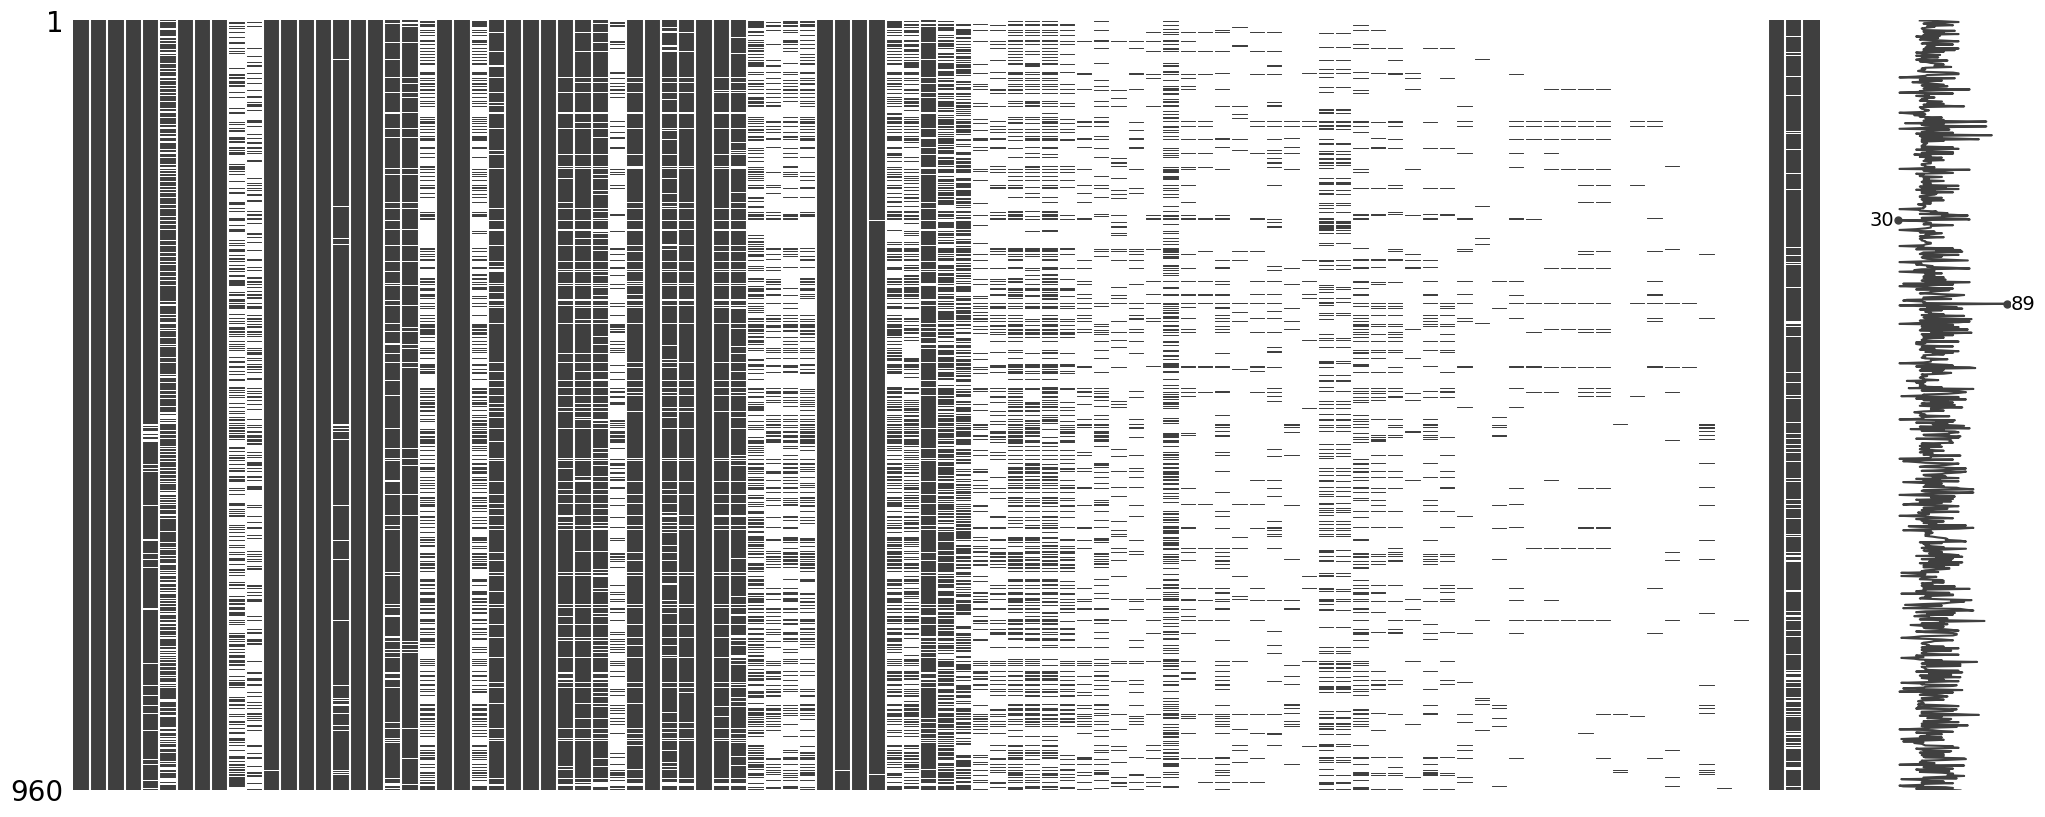

In [9]:
missingno.matrix(df)